In [30]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [31]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [32]:
m.shape

(2553, 14)

# Train Test Split

In [33]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

In [34]:
X_train.shape

(2042, 10)

In [35]:
X_test.shape

(511, 10)

In [36]:
X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1739,0.789,5,-5.986,1,0.1150,0.015600,0.000000,0.382,0.438,207133
1747,0.427,10,-6.993,1,0.0234,0.313000,0.000000,0.138,0.263,204706
1426,0.739,6,-5.834,0,0.0476,0.000522,0.000080,0.354,0.717,212533
371,0.894,8,-4.542,1,0.3470,0.479000,0.000000,0.338,0.637,614563
1832,0.634,7,-4.807,1,0.0324,0.038000,0.000002,0.304,0.615,212600


In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# predictions
y_pred = model.predict(X_test)
y_pred[1:10]

array([0.56770059, 0.56614288, 0.51457927, 0.58788133, 0.69597498,
       0.66488893, 0.69207184, 0.64921256, 0.57020346])

In [39]:
model.score(X_test, y_test) #testing R2

0.3160015522433671

In [40]:
model.score(X_train, y_train) #training R2

0.37144141289223925

In [41]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
475,0.518762,0.450
1322,0.567701,0.775
1725,0.566143,0.737
575,0.514579,0.304
1277,0.587881,0.619


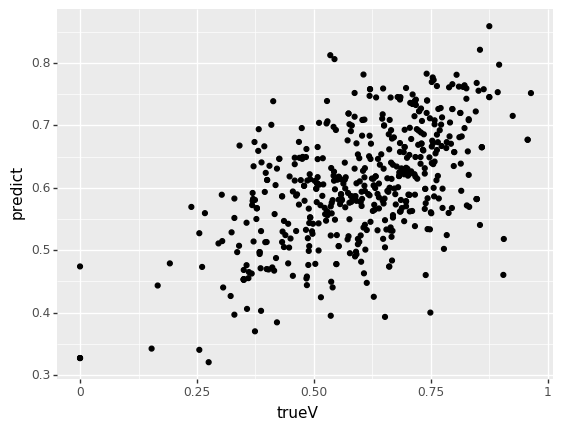

<ggplot: (317109580)>

In [42]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

# K Fold

In [43]:
kf = KFold(n_splits = 10)

In [44]:
x = m[predictors]
y = m["danceability"]

model = LinearRegression()

In [45]:
mse = cross_val_score(model, x,y, cv = kf, scoring = "neg_mean_squared_error")

In [46]:
mse

array([-0.02093031, -0.02398416, -0.01761189, -0.01403148, -0.01796454,
       -0.0212833 , -0.02109307, -0.00763517, -0.01173777, -0.01199926])

In [47]:
np.mean(mse)

-0.016827095268677806

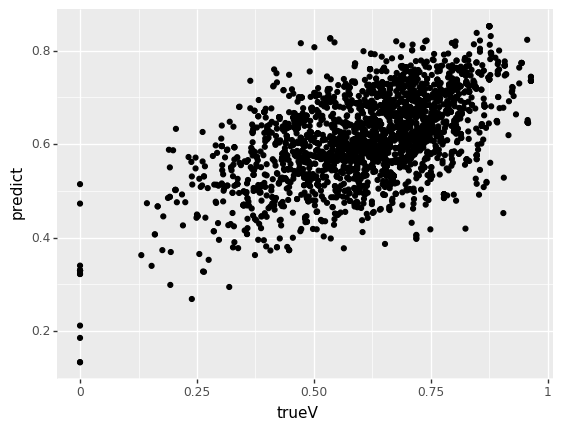

<ggplot: (317123220)>

In [48]:
y_pred = cross_val_predict(model, x,y, cv = kf)
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

In [49]:
r2_score(y, y_pred)

0.3121168054907405

# Leave One Out

In [50]:
loo = LeaveOneOut()

In [51]:
mse = cross_val_score(model, x,y, cv = loo, scoring = "neg_mean_squared_error")

In [52]:
np.mean(mse)

-0.01577326185227478

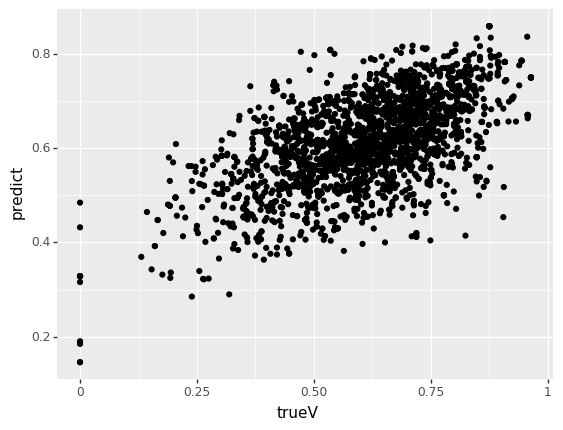

<ggplot: (317111095)>

In [53]:
y_pred = cross_val_predict(model, x,y, cv = loo)
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

In [54]:
r2_score(y, y_pred)

0.3553777258651504

# Quick Note about Data Leakage...

In [55]:
# Say you want to standardize...

X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1739,0.789,5,-5.986,1,0.1150,0.015600,0.000000,0.382,0.438,207133
1747,0.427,10,-6.993,1,0.0234,0.313000,0.000000,0.138,0.263,204706
1426,0.739,6,-5.834,0,0.0476,0.000522,0.000080,0.354,0.717,212533
371,0.894,8,-4.542,1,0.3470,0.479000,0.000000,0.338,0.637,614563
1832,0.634,7,-4.807,1,0.0324,0.038000,0.000002,0.304,0.615,212600


In [56]:
zscore = StandardScaler()

In [57]:
zscore.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
Xz_train = zscore.transform(X_train)

In [59]:
Xz_test = zscore.transform(X_test) # DO NOT REFIT, I REPEAT DO NOT REFIT